No handles with labels found to put in legend.


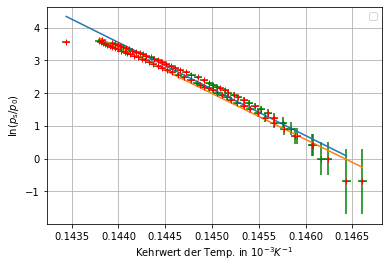

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats as sci

p1 = np.loadtxt("Messwerte1.txt", float, usecols=0)
T1 = np.loadtxt("Messwerte1.txt", float, usecols=1)
p2 = np.loadtxt("Messwerte1.txt", float, usecols=2)
T2 = np.loadtxt("Messwerte1.txt", float, usecols=3)

P2 = np.zeros(len(T2)+1)
t2 = np.zeros(len(T2)+1)

for i in range(len(T2)):
	P2[i] = p2[i]
	t2[i] = T2[i]

P2[-1] = 0.5
t2[-1] = 1337

T2 = t2
p2 = P2

A = 3.9083e-3 + 273.15
B = -5.775e-7 
R0 = 1000
Lambda = 40642
fT = 0.3
fP = 0.5
r = 8.315

p1 = p1[1:]


sigmaP1 = fP*1/p1
sigmaP2 = fP*1/p2

def temp(T):
	return (- A - np.sqrt(A**2-4*B*T/R0))/(2*B) - 273




sigmaT1 = fT*1/temp(T1[1:])
sigmaT2 = fT*1/temp(T2)



x1 = 1/temp(T1[1:])*10**3
x2 = 1/temp(T2)*10**3

slope1, intercept1, r_value1, p_value1, std_err1 = sci.linregress(x1, np.log(p1))
slope2, intercept2, r_value2, p_value2, std_err2 = sci.linregress(x2, np.log(p2))


plt.errorbar(x1, np.log(p1), xerr=sigmaT1, yerr=sigmaP1, fmt='+', ecolor='g', color='r')
plt.errorbar(x2, np.log(p2), xerr=sigmaT2, yerr=sigmaP2, fmt='+', ecolor='g', color='r')


plt.plot(x1, slope1*x1 + intercept1)
plt.plot(x2, slope2*x2 + intercept2)

"""
plt.plot(1/temp(T1[1:])*10**3, np.log(p1[1:]), label='Aufwärmskurve')
plt.plot(1/temp(T2)*10**3, np.log(p2), label='Abkühlkurve')
"""

plt.grid('True')
plt.ylabel(r'ln($p_\mathrm{s}$/$p_0$)')
plt.xlabel(r'Kehrwert der Temp. in $10^{-3}K^{-1}$')
plt.legend(loc='upper right')




plt.show()
